In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


from tqdm import tqdm
from matplotlib import pyplot as plt

import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split

from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import os

In [2]:
import tensorflow as tf

import tensorflow.keras
from tensorflow import keras

from tensorflow.keras import layers

from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [3]:
data = pd.read_csv('d:/dataset/nasdqTR.csv')
#df = pd.DataFrame(data=d, dtype=np.int8)
data=data.dropna()
data.shape

(6510, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6510 entries, 0 to 6509
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6510 non-null   object 
 1   Open    6510 non-null   float64
 2   High    6510 non-null   float64
 3   Low     6510 non-null   float64
 4   Close   6510 non-null   float64
 5   Volume  6510 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 305.3+ KB


In [5]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/2/1990,452.899994,459.299988,452.700012,459.299988,110720000
1,1/3/1990,461.100006,461.600006,460.000000,460.899994,152660000
2,1/4/1990,460.399994,460.799988,456.899994,459.399994,147950000
3,1/5/1990,457.899994,459.399994,457.799988,458.200012,137230000
4,1/8/1990,457.100006,458.700012,456.500000,458.700012,115500000


In [6]:
#data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6510 entries, 0 to 6509
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6510 non-null   object 
 1   Open    6510 non-null   float64
 2   High    6510 non-null   float64
 3   Low     6510 non-null   float64
 4   Close   6510 non-null   float64
 5   Volume  6510 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 305.3+ KB


In [8]:
#for i in range(6510):
data['NDate'] = data['Date'].str.replace('\D', '').astype(int)
    
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6510 entries, 0 to 6509
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6510 non-null   object 
 1   Open    6510 non-null   float64
 2   High    6510 non-null   float64
 3   Low     6510 non-null   float64
 4   Close   6510 non-null   float64
 5   Volume  6510 non-null   int64  
 6   NDate   6510 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 330.7+ KB


C:\Users\Naeim\AppData\Local\Temp\ipykernel_15128\2120947312.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['NDate'] = data['Date'].str.replace('\D', '').astype(int)


In [9]:
data.head()

,Date,Open,High,Low,Close,Volume,NDate
0,1/2/1990,452.899994,459.299988,452.700012,459.299988,110720000,121990
1,1/3/1990,461.100006,461.600006,460.000000,460.899994,152660000,131990
2,1/4/1990,460.399994,460.799988,456.899994,459.399994,147950000,141990
3,1/5/1990,457.899994,459.399994,457.799988,458.200012,137230000,151990
4,1/8/1990,457.100006,458.700012,456.500000,458.700012,115500000,181990


In [10]:
import os, sys
#import Image
from PIL import Image
train_img = []
label=[] 
i=0
count =0 

for i in range(0,6510,30):
    
    
    #XX=data.iloc[i:i+29]['Close']
    #f=plt.figure(figsize=(7,7),dpi=4)
    #plt.plot(XX)
    #plt.show()
    #plt.savefig(f'd:/dataset/plot_nsq28/_{i}_.png')
    image_path=f'd:/dataset/plot_nsq64/_{i}_.png'
    img = imread(image_path, as_gray=True)
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)
    
    label.append(data.iloc[i+29]['NDate'])
    count+=1

print(" count = " ,count)
# converting the list to numpy array
train_x = np.array(train_img)
train_x.shape

 count =  217


(217, 64, 60)

In [11]:
import datetime


train_y=np.array(label)

train_y.shape

train_y

array([ 2121990,  3271990,   591990,  6211990,   831990,  9171990,
       10291990, 12111990,  1241991,   381991,  4221991,   641991,
        7171991,  8281991, 10101991, 11211991,   171992,  2191992,
         411992,  5141992,  6261992,  8101992,  9221992,  1131992,
       12161992,  1291993,  3151993,  4271993,   691993,  7221993,
         921993, 10151993, 11291993,  1111994,  2231994,   471994,
        5201994,   751994,  8161994,  9281994,  1191994, 12221994,
         261995,  3211995,   531995,  6151995,  7281995,  9111995,
       10231995,  1251995,  1181996,   311996,  4151996,  5281996,
        7101996,  8211996,  1031996, 11141996, 12301996,  2111997,
        3261997,   581997,  6201997,   841997,  9161997, 10281997,
       12101997,  1261998,  3101998,  4221998,   641998,  7171998,
        8281998, 10121998, 11231998,   171999,  2221999,   461999,
        5181999,  6301999,  8121999,  9241999,  1151999, 12201999,
         222000,  3162000,  4282000,  6122000,  7252000,   962

2121990
1291993


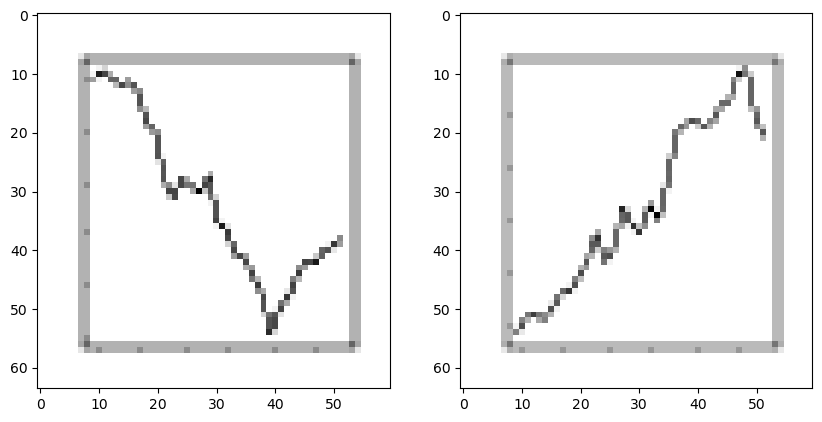

In [12]:
i = 0
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(train_x[0], cmap='gray')
print(train_y[0])
plt.subplot(122), plt.imshow(train_x[25], cmap='gray')
print(train_y[25])
#plt.subplot(112),plt.imshow(train_x[50], cmap='gray')
#plt.subplot(114),plt.imshow(train_x[75], cmap='gray')

In [13]:

#train_y=list(range(0,count))
train_y=np.array(train_y)
train_y.shape


(217,)

In [14]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y,val_y  = train_test_split(train_x,train_y, test_size = 0.1)
(train_x.shape,train_y.shape), (val_x.shape,val_y.shape)


(((195, 64, 60), (195,)), ((22, 64, 60), (22,)))

In [15]:
print(train_x.shape)
print(train_y.shape)

(195, 64, 60)
(195,)


In [16]:

train_x = train_x.reshape(195, 1, 64 , 60)
train_x  = torch.from_numpy(train_x)

# converting the target into torch format

train_y = train_y.astype(int);
train_y = torch.from_numpy(train_y)

# shape of training data
train_x.shape , train_y.shape

(torch.Size([195, 1, 64, 60]), torch.Size([195]))

In [17]:
val_x = val_x.reshape(22, 1, 64, 60)
val_x  = torch.from_numpy(val_x)

# converting the target into torch format
val_y = val_y.astype(int);
val_y = torch.from_numpy(val_y)

# shape of validation data
val_x.shape, val_y.shape

(torch.Size([22, 1, 64, 60]), torch.Size([22]))

In [18]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=(5,3), stride=(3,1), dilation=(2,1), padding=(12,1)),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(negative_slope=0.01, inplace=True),
            nn.MaxPool2d((2, 1), stride=(2, 1)),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=(5,3), stride=(3,1), dilation=(2,1), padding=(12,1)),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(negative_slope=0.01, inplace=True),
            nn.MaxPool2d((2, 1), stride=(2, 1)),
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=(5,3), stride=(3,1), dilation=(2,1), padding=(12,1)),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(negative_slope=0.01, inplace=True),
            nn.MaxPool2d((2, 1), stride=(2, 1)),
        )
        self.fc1 = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(46080, 2),
        )
        self.softmax = nn.Softmax(dim=1)
       
    def forward(self, x):
        x = x.reshape(-1,1,64,60)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.reshape(-1,46080)
        x = self.fc1(x)
        #x = self.softmax(x)
        return x

In [19]:
model = Net()
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
#if torch.cuda.is_available():
   # model = model
   # criterion = criterion
    
print(model)

Net(
  (layer1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 3), stride=(3, 1), padding=(12, 1), dilation=(2, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 3), stride=(3, 1), padding=(12, 1), dilation=(2, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(5, 3), stride=(3, 1), padding=(12, 1), dilation=(2, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): MaxPoo

In [20]:
print(train_y.shape) 
print(train_x.shape)

torch.Size([195])
torch.Size([195, 1, 64, 60])


In [21]:
def train(epoch):
    
    model.train()
    tr_loss = 0
   
   
    optimizer.zero_grad()
    
    output_train=model(train_x)
    output_val = model(val_x)
    print("output :",output_train.shape)
    print("train_y :",train_y.shape)
# computing the training and validation loss
    print("Test1")
    loss_train = criterion(output_train, train_y)
    print("output :",output_train.shape)
    print("train_y :",train_y.shape)
    loss_val = criterion(output_val,val_y)    
    train_losses.append(loss_train)
    val_losses.append(loss_val)
    
# computing the updated weights of all the model parameter
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()    
    #if epoch%2 == 0:
        
        # printing the validation loss
    print('Epoch : ',epoch+1 ,  '\t','loss :', loss_val)
    
    

#print(output_train.shape)
#print(y_train.shape)

In [23]:
# defining the number of epochs
x = torch.randn([1,1,64,60])
n_epochs =10
batch=64
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []

train_y=train_y.long().random_(2)
print(train_y.shape)
val_y=val_y.long().random_(2)
# training the model
for epoch in range(n_epochs):
    train(epoch)

torch.Size([195])
output : torch.Size([195, 2])
train_y : torch.Size([195])
Test1
output : torch.Size([195, 2])
train_y : torch.Size([195])
Epoch :  1 	 loss : tensor(625.5356, grad_fn=<NllLossBackward0>)
output : torch.Size([195, 2])
train_y : torch.Size([195])
Test1
output : torch.Size([195, 2])
train_y : torch.Size([195])
Epoch :  2 	 loss : tensor(332.4025, grad_fn=<NllLossBackward0>)
output : torch.Size([195, 2])
train_y : torch.Size([195])
Test1
output : torch.Size([195, 2])
train_y : torch.Size([195])
Epoch :  3 	 loss : tensor(314.9142, grad_fn=<NllLossBackward0>)
output : torch.Size([195, 2])
train_y : torch.Size([195])
Test1
output : torch.Size([195, 2])
train_y : torch.Size([195])
Epoch :  4 	 loss : tensor(395.4535, grad_fn=<NllLossBackward0>)
output : torch.Size([195, 2])
train_y : torch.Size([195])
Test1
output : torch.Size([195, 2])
train_y : torch.Size([195])
Epoch :  5 	 loss : tensor(168.3037, grad_fn=<NllLossBackward0>)
output : torch.Size([195, 2])
train_y : torch.S

In [24]:
print("train loss :" ,train_losses)
print("val loss : ",val_losses)


train loss : [tensor(672.0020, grad_fn=<NllLossBackward0>), tensor(351.3651, grad_fn=<NllLossBackward0>), tensor(296.5813, grad_fn=<NllLossBackward0>), tensor(373.9347, grad_fn=<NllLossBackward0>), tensor(161.3982, grad_fn=<NllLossBackward0>), tensor(230.2464, grad_fn=<NllLossBackward0>), tensor(261.3763, grad_fn=<NllLossBackward0>), tensor(94.7349, grad_fn=<NllLossBackward0>), tensor(162.8335, grad_fn=<NllLossBackward0>), tensor(244.7350, grad_fn=<NllLossBackward0>)]
val loss :  [tensor(625.5356, grad_fn=<NllLossBackward0>), tensor(332.4025, grad_fn=<NllLossBackward0>), tensor(314.9142, grad_fn=<NllLossBackward0>), tensor(395.4535, grad_fn=<NllLossBackward0>), tensor(168.3037, grad_fn=<NllLossBackward0>), tensor(212.2475, grad_fn=<NllLossBackward0>), tensor(243.5401, grad_fn=<NllLossBackward0>), tensor(86.2317, grad_fn=<NllLossBackward0>), tensor(170.6022, grad_fn=<NllLossBackward0>), tensor(262.9557, grad_fn=<NllLossBackward0>)]


In [25]:
from matplotlib import pyplot as plt
#train_losses_A=train_losses
type(train_losses)
#tr=train_losses.detach.numpy()
#vl=val_losses.numpy()
#plt.plot(tr,vl)
#plt.show()

list

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


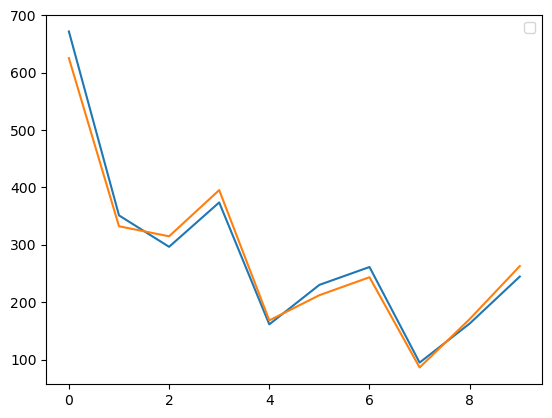

In [26]:
with torch.no_grad():
    plt.plot(train_losses)
    plt.plot(val_losses)
    plt.legend()
    plt.show()